<a href="https://colab.research.google.com/github/cogitare-aude/datasharing/blob/master/CNN_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Model

**About the Data:**
* This project uses the IMDB Dataset of 50K Movie Reviews, which is a balanced set of 25K positive & 25K negative reviews for classification training (pic 1.)
* This dataset is intentionally chossen because it's different than what was used by the journal publications that this project replicatings or references, to further compensate for potential generalization bias
  * Reusing the same tried-and-true dataset used by the journal publication whose model is being replicated may overstatement for accuracy, thus impacting this project comparative (of various models) abilities.
* Data processing:
  * Cleaning: white space, punctuations, standard stop-words, and words that only appeare once are removed from the entire corpus (train & test data.
  * Filtering: a vocabulary using only training-data filters out words in the entire corpus that only appeared twice of less.
  * Embedding: words that make up each sentence which inturn makes up each review is turned into real-valued vectors.
    * To train a neural network on text data, we need to first turn each word into a numerical representation.
    * We further create associations between words based on their proximity to each other in a sentence.
    * A movie review is turned into real valued vectors in a high-dimensional space (Brownlee, 2020).
  * Padding: reviews are of various length, to ensure accuracy in training, all reviews (embedded vectors) are padded with 0s to match the length of the longest review.
  * Train, Validation, Test split:
    * 80% of the corpus is used for training, further 20% of training data is used for validation.
    * 20% of the corpus is reserved as unseen data used for testing the model.
    * Selection is made randomly without replacement.


  

Pic 1. Classification Objective


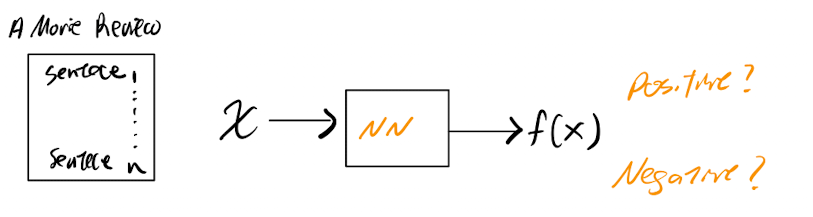

In [ ]:
#objective image
print('Pic 1. Classification Objective')
Image(filename = 'image_objective.png', width = 600)

**About 1-D CNN:**
* The first type of Neural Network in this comparative analysis is a 1-Dimensional Convolutional Neural Network (1D CNN).
* Two 1D CNN models are built to predict positive & negative movies:
  * Model 1 is a near-identical replication of the 1D CNN model found in the Machine Learning Mastery article (Brownlee, 2020).
  * Model 2 is an improvement from the Machine Learning Mastery model based on Kim’s 2014 paper on NLP and recent neural network developments around VGG blocks (Simonyan, et al. 2014).
* 1D CNNs are used for this project instead of more common 2D CNNs because word embeddings, real-valued vectors, in the movie review data are 1-dimensional signals (not 2-D such as images or video).
  * 1D CNNs have recently gained popularity due to its low cost & low computational resource requirements (Kiranyaz, et al. 2020).
  * The computational complexity of a 1D CNN is only $\mathbb O(NK) $ as compared to 2D CNN’s $\mathbb O(N^2K^2) $ , where $\mathbb N $ & $\mathbb K $ are input dimension & kernel size.

**About Model One:**
* Model Summary:
  * This model is a close replication of Brownlee's model on the Machine Learning Mastery website.
  * Test Accuracy: 86%
  * Validation Accuracy: ~80%
  * While *Accuracy* is good, `Model 1` suffers from extremely high *Validation Loss* (fig. 1), meaning this model may have generalizability problems when applied to unseen data.
* Model Configuration:
  * Model is a 1D CNN built using the high-level Keras API (pic 2.)
  * Architecture: Embedding Layer -> 1D Convolutional Layer -> Max Pooling Layer -> Flatten Layer -> Dense Layer 1 -> Dense Layer 2
    * $\mathbb x_i ∈ {R}^k $ is $\mathbf i $-th word (embedding) transfomed into a real valued vector in a high-dimensional space of $\mathbf k $-th dimension
    * $\mathbb x_{i:n}=x_1+x_2+...x_n $ is a (padded) sentence within a movie review
    * $\mathbf w ∈ {R}^{hk} $ is the filter of the convolutional layer which is applied to $\mathbf h $-words to generate feature $\mathbf c_i $
    * $\mathbb c_i = f(wx_i+b)$ which is a *non-linear* transformation of a set of *weight* & *bias* term for a feature
  * Parameters: Binary-Crossentropy Loss-Function; Adam Optimizer; 10 Epochs

Details of the Model:

* Embedding Layer: acts as the *Input Layer* of the CNN model. The output of this layer is a vector matrix (ie. 2-dimensional) with one embedding for each word in the input sequence of sentences that makes up each movie review. This layer takes three arguments:
  * Input-Dimension is the total number of unique words that may be used for embedding of an input sentence
  * Output-Dimension is the size of this layer’s output vector space, this model uses 100, following the model being replicated
  * Input-Length is the maximum length of all reviews that would be used (all reviews are padded).
* One 1D CNN Layer: this layer uses the output of the *Embedding Layer* to learn features and the number of weights through cross correlating the kernel and input vector.
* One Maxpooling Layer: this is used to reduce the size of the 1D CNN Layer’s output by half by summarizing/grouping features, which helps with regularization and invariance of distortions.
* One Flatten Layer: this is used to turn the vector matrix generated by the 1D CNN Layer into a long vector (ie. 1-dimensional) that can be fed into a standard Multi-Layer Perceptron network.
* Two MLP Layers: these fully connected layers with dense 10 and 1 respectively (`desne = 1` as output must be `[0,1]` for binary classification) are used for the classifier to interpret & predict from features of the matrix.
* ReLu Activation Function: this is used because it will output `0` or the `input-value` (ie. `1` if positive), which is beneficial for classification problems as there are no “in-between” classes.
* Sigmoid Activation: this is used for the output layer as it ensure the model outputs only probabilty between `[0,1]` which is required for binary classification (ie. positive or negative).
* Binary—Crossentropy Loss-Function: this is used to calculate the model's loss in the training process as this is a binary classification problem.
* Adam Optimizer: this verion of Stochastic Gradient Descent is used to facilitate the back-propagation process of updating training weights to increase accuracy (ie. minimize loss).
* 10 Epochs: this ensures the training model passes through the data 10 times.

Model Training:

* Initialize parameters $(\mathbf{w}, b)$
* Repeat until done:
    * Compute gradient $\mathbf{g} $
    * Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

Pic 2. CNN Model


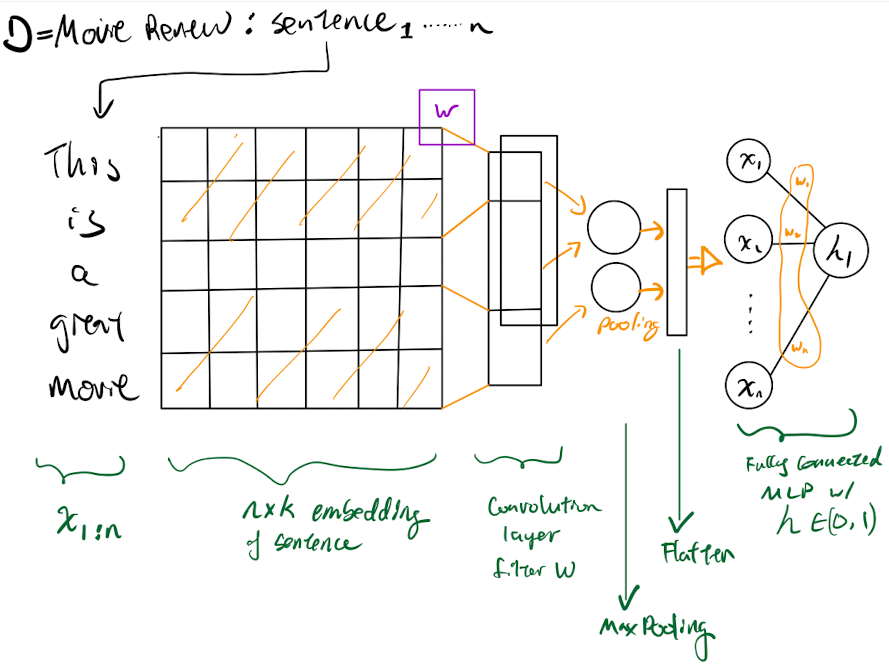

In [ ]:
#CNN image
print('Pic 2. CNN Model')
Image(filename = 'image_cnn.png', width = 600)

Test Accuracy: 87.089998


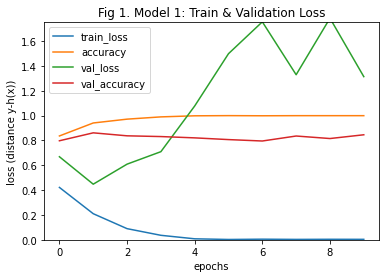

In [ ]:
#display fig. 1
results.plot(ylabel = ("loss (distance y-h(x))"), xlabel = ("epochs"), title = ("Fig 1. Model 1: Train & Validation Loss"), ylim = [0, 1.75])
print('Test Accuracy: %f' % (acc_1 * 100))

**About Model Two:**
* Model Summary:
  * This model is an improvement of `Model 1` which was replicated from Brownlee.
  * Test Accuracy: 89%
  * Validation Accuracy: ~89%
  * `Model 2` offers 66% less Training-Time, as increased Accuracy of 3%, and Validation-Loss that is near Training-Loss when compared to `Model 1` (fig. 2).
  * `Model 2` improvements are inspired by VGG Blocks (Simonyan, et al. 2015) & Hyper-Parameters from a 2014 sentence classification paper by Kim.

* Model Configuration:
  * 1D CNN model built using the high-level Keras API
  * Architecture: Embedding Layer -> VGG Block 1 -> VGG Block 2 -> VGG Block 3 -> Flatten Layer -> Dense Layer 1 -> Dense Layer 2
  * Parameters: Binary-Crossentropy Loss-Function; Adam Optimizer; 20 Epochs; Batch-Size 50; Early-Stop 25
  * VGG block: each VGG Block contains two 1D CNN Layers, a Moxpooling Layer, and a Dropout Layer

Details of the Model:

* Embedding Layer: same as `Model 1`, but uses `Output-Dimension = 150` (instead of 100) to preserve a largeer output vector space for feature extraction/learning in later on VGG Blocks.
* VGG Block 1: following the classic VGG configuration defined by Simonyan et al., however this model uses 1D CNN Layers.
  * Maxpooling Layer achieves similar effect as in `Model 1
  * Dropout Layer is a regularization technique that ignores a certain number of neurons during each training epoch. This is set to 0.5 based on Kim’s 2014 paper and aims to lower `Model 1's` high Validation-Loss
* VGG Block 2 & 3: same as VGG Block 1, but using filter size of 64 & 128 respectively, following VGG convention.
* Batches:
  * `Batch-size = 50` helps to utilize GPU’s parallel computing power for increased efficiency.
  * Early-Stop at `Batch-Number = 25` also helps to increase efficiency and decrease Validation-Loss.

Test Accuracy: 88.800001


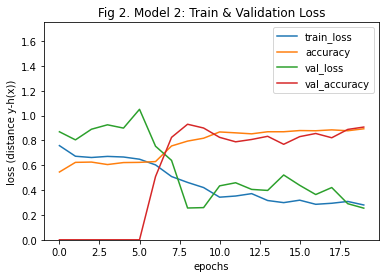

In [ ]:
results_2.plot(ylabel = ("loss (distance y-h(x))"), xlabel = ("epochs"), title = ("Fig 2. Model 2: Train & Validation Loss"), ylim = [0, 1.75])

print('Test Accuracy: %f' % (acc * 100))

**Interesting Observations**

* Optimizer: Adam is the best optimizer compared to SDG and Adadelta, which was suggested in the referenced 2014 paper by Kim.
* Learning-Rate default is the best, any changes to learning rate significantly decreased the Accuracy of the model, suggesting there are lots of local-minimums for the model to be "stuck" at (whether learning too fast or slow)
  * Since Adam does not have a Momentum feature, Learning-Rate was not manipulated.

**Reference Bibliography:**
* Brownlee, J. (2020, September 2). Deep convolutional neural network for sentiment analysis (text classification). Machine Learning Mastery. Retrieved March 21, 2022, from https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/
* Kim, Y. (2014). Convolutional neural networks for sentence classification. Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), 1746–1751. Retrieved March 21, 2022, from https://doi.org/10.3115/v1/d14-1181
* Kiranyaz, S., Avci, O., Abdeljaber, O., Ince, T., Gabbouj, M., & Inman, D. J. (2021). 1D convolutional neural networks and applications: A survey. Mechanical systems and signal processing, 151, 107398. Retrieved March 21, 2022, from https://doi.org/10.1016/j.ymssp.2020.107398
* Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. Retrieved March 21, 2022, from https://www.robots.ox.ac.uk/~vgg/research/very_deep/

# General Start-up Code

In [ ]:
#General Code

#give access to My Drive (Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Note: if 'error' then Runtime->Restart Runtime

#import TF packages for model build/train CNN/RNN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Embedding
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import np_utils
from tensorflow.keras import utils

#import sklearn for train/test data split
from sklearn import model_selection as skms

#import lib for data read/manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame as df

#import lib for text processing
import collections
import re

#import lib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#import lib for text data tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

#define path for data
import os
os.chdir('drive/My Drive/Colab Notebooks/Group_14')

#for writing .csv
import csv

#for text cleaning
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from collections import Counter
from keras.preprocessing.sequence import pad_sequences

#to load images
from IPython.display import Image

#set seed for random-fns results to be reproducible
tf.random.set_seed(0)
np.random.seed(0)

#print version of TF
print(tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
2.8.0


# Step 1: Text Preprocessing

In [ ]:
#define function for cleaning & spliting (neg or pos) review data
def clean_reviews(input_data, sentiment):
  '''
  input review data as one-string per review, specify whether positive or negative review:
  match everything after 'comma' ($ = start at the end), ie. sentiment column value
  if said value == 'positive'
  remove said value & ',' before that value, and record review-content into pos_review
  returns a cleaned list of reviews (one review per string)
  '''
  pos_neg_review = [re.sub('(\,[^,]*)$', '', ea_line) for ea_line in input_data if re.search('([^,]*)$', ea_line).group(1) == sentiment]
  return pos_neg_review


In [ ]:
#load data into a list
with open('IMDB_Dataset.csv', 'r') as f:
  #skip first (header) line
  next(f)
  lines = f.readlines()

#all reviews data in a list: remove white space & lower-case all
text_data = [ea_line.strip().lower() for ea_line in lines]


#create list for Positive & Negative Reviews
pos_review = clean_reviews(text_data, 'positive')
neg_review = clean_reviews(text_data, 'negative')


In [ ]:
neg_review[1]

'"this show was an amazing, fresh & innovative idea in the 70\'s when it first aired. the first 7 or 8 years were brilliant, but things dropped off after that. by 1990, the show was not really funny anymore, and it\'s continued its decline further to the complete waste of time it is today.<br /><br />it\'s truly disgraceful how far this show has fallen. the writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn\'t still be on the air. i find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. how can one recognize such brilliance and then see fit to replace it with such mediocrity? i felt i must give 2 stars out of respect for the original cast that made this show such a huge success. as it is now, the show is just awful. i can\'t believe it\'s still on the air."'

In [ ]:
#create index for train/test (80% train)
train_index = int(len(neg_review) * 0.8)

#ensures sample randomness everytime
np.random.seed(0)

#randomly shuffle (list is an ordered datatype)
np.random.shuffle(neg_review)
np.random.shuffle(pos_review)

#randomly sample w/o replacement
#neg_review_train = random.sample(neg_review, k = train_index)
#pos_review_train = random.sample(pos_review, k = train_index)

#80% data for training (20K reviews)
neg_review_train = neg_review[0:train_index]
pos_review_train = pos_review[0:train_index]

#20% data for testing (5K reviews)
neg_review_test = neg_review[train_index: ]
pos_review_test = pos_review[train_index: ]

In [ ]:
#checking the data
neg_review_train[0:3]

['"i am wanting to make a ""holmes with doors"" pun but i can\'t quite string it all together. suitably grubby and over edited wonderland gives kilmer a role that channels morrison at the same time....but how coy is this film about the famous 14 inches! australian crime films flash it all the time and skip the graphic violence instead.....as someone famous said once about us cinema double standards: ""kiss a breast and it\'s an x, stab it and its an action pg 13""... wonderland is 14 minutes too long too, and at the end the tawdry spiral we were all glad to escape the cinema. how many films called wonderland are we going to get? there must be six in the last decade. the pixilated violence and muted color sets the seedy tone but the wobble-cam gets tiresome, as if we are gawking at their nostrils all the time. taking a few cues form the doors and taxi driver it all becomes forgettable the next day."',
 '"this had high intellectual pretensions.the main lead intends to give a ""deep"" ""m

In [ ]:
#create dictionary [key:value] -> [token:count] of all tokens in both pos + neg lists
  #using TRAIN data only
vocab_dict = Counter()

#tokenize & add to vocab-dict all positive reviews
for review in pos_review_train:
  #split into tokens by white space
  tokens = review.split()
  #create a mapping table to use by 'translate' to match & replace all punctuations
  translate_table = str.maketrans('', '', string.punctuation)
  #match & replace all punctuations in ea. token
  tokens = [w.translate(translate_table) for w in tokens]
  #checks if all characters in token are letters (remove if not)
  tokens = [word for word in tokens if word.isalpha()]
  #remove tokens that are stop words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if not word in stop_words]
  #remove tokens are length <= 2
  tokens = [word for word in tokens if len(word) > 2]

  #update dictionary with tokens
  vocab_dict.update(tokens)

#tokenize & add to vocab-dict all negative reviews
for review in neg_review_train:
  #split into tokens by white space
  tokens = review.split()
  #create a mapping table to use by 'translate' to match & replace all punctuations
  translate_table = str.maketrans('', '', string.punctuation)
  #match & replace all punctuations in ea. token
  tokens = [w.translate(translate_table) for w in tokens]
  #checks if all characters in token are letters (remove if not)
  tokens = [word for word in tokens if word.isalpha()]
  #remove tokens that are stop words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if not word in stop_words]
  #remove tokens are length <= 2
  tokens = [word for word in tokens if len(word) > 2]

  #update dictionary with tokens
  vocab_dict.update(tokens)

#only keep tokens >= 2 occurence (vocab_dict is the full token:count dictionary)
min_occurane = 2
tokens = [vocab for vocab, occurance in vocab_dict.items() if occurance >= min_occurane]

#join all tokens tgt separated by 'new-line' (ie. one word per line) & save to file
data = '\n'.join(tokens)
file = open('vocabulary_list.txt', 'w')
file.write(data)
file.close()


In [ ]:
#checking the data
print(len(vocab_dict))

print(len(tokens))

153771
71121


# Step 2: Embedding Data

In [ ]:
#vocab_list is used for filtering-out data in ea. review

#load vocabulary-list data
with open('vocabulary_list.txt', 'r') as f:
  vocab_list = f.read()

#split joined-token into elements by \n
vocab_list = vocab_list.split()
#turn into set-datatype
vocab_list = set(vocab_list)


In [ ]:
def tockenize_reviews(input_reviews, vocab_filter):
  '''
  tokenize & add to vocab-dict all positive reviews
  return a list of one tokenized-string per review
  '''
  #placehold empty list
  pos_neg_documents = list()

  for review in input_reviews:
    #split into tokens by white space
    tokens = review.split()
    #create a mapping table to use by 'translate' to match & replace all punctuations
    translate_table = str.maketrans('', '', string.punctuation)
    #match & replace all punctuations in ea. token
    tokens = [w.translate(translate_table) for w in tokens]

    #new: only include tokens of a review if in previously defined vocab_list
      #vocab_list (act as filter): stopwords + frequency filtered for all pos & neg training moview reviews
    tokens = [word for word in tokens if word in vocab_filter]
    #join tokens into one string separated by ' '
    tokens = ' '.join(tokens)

    #add tokens for a-review to master-list
    pos_neg_documents.append(tokens)

  return pos_neg_documents


In [ ]:
#create a list for reviews ("one string of tokens per review")
pos_documents = list()
neg_documents = list()

#for TRAIN
pos_documents = tockenize_reviews(pos_review_train, vocab_list)
neg_documents = tockenize_reviews(neg_review_train, vocab_list)
#final merge of pos + neg list
  #['token_review_1 token_review_1 .....', 'token_review_2, token_review_2....', ....]
train_documents = pos_documents + neg_documents

#for TEST
pos_documents = tockenize_reviews(pos_review_test, vocab_list)
neg_documents = tockenize_reviews(neg_review_test, vocab_list)
#final merge of pos + neg list
  #['token_review_1 token_review_1 .....', 'token_review_2, token_review_2....', ....]
test_documents = pos_documents + neg_documents

#data checker
print(len(train_documents), '+', len(test_documents), '=', len(text_data))

40000 + 10000 = 50000


In [ ]:
#tockenize (embedding ea. review's tokens)

#create tokenizer
tokenizer = Tokenizer()
#map tokenizer on all vocab in train_docs (ie. ea. review is a string)
tokenizer.fit_on_texts(train_documents)

#for TRAIN
#apply mapping to all reviews in doc. (sequence encode all tokens)
  #represent tokens w/ real valued vector in high-dim space
    #real valued vector: numerical
    #high-dim space: words w/ similar meanings are closer in vector space
encoded_documents = tokenizer.texts_to_sequences(train_documents)

#add padding to ensure all reviews (ea. docs) are same length (since tokens are real value vectorized, add 0's)
max_length_review = max([len(ea_review.split()) for ea_review in train_documents])
x_train = pad_sequences(encoded_documents, maxlen = max_length_review, padding = 'post')

#define training labels (pos & neg)
  #train_documents = pos_documents + neg_documents
  #length of train_documents/2 -> half of reviews are pos/neg (ie. ea. review is a string of tokens) => label: 1
y_train = np.array([1 for _ in range(int(len(train_documents)/2))] + [0 for _ in range(int(len(train_documents)/2))])


#for TEST
#apply mapping to all reviews in doc. (sequence encode all tokens)
  #represent tokens w/ real valued vector in high-dim space
    #real valued vector: numerical
    #high-dim space: words w/ similar meanings are closer in vector space
encoded_documents = tokenizer.texts_to_sequences(test_documents)

#add padding to ensure all reviews (ea. docs) are same length (since tokens are real value vectorized, add 0's)
x_test = pad_sequences(encoded_documents, maxlen = max_length_review, padding = 'post')

#define training labels (pos & neg)
  #train_documents = pos_documents + neg_documents
  #length of pos_documents (ie. ea. review is a string of tokens) => label: 1
y_test = np.array([1 for _ in range(int(len(test_documents)/2))] + [0 for _ in range(int(len(test_documents)/2))])


#data checker
print(len(x_test), '=', len(y_test))
print(len(x_train), '=', len(y_train))

10000 = 10000
40000 = 40000


# Step 3: Training CNN

In [ ]:
#the size of the real-valued vector space = 100
#the maximum length of input document (ie. longest review)

#vocabulary size (number of tokens in unique token-list of vocabulary-list)
vocab_size = len(tokenizer.word_index) + 1

#data cheker
print(len(tokens), '=', vocab_size, '- 1')

71121 = 71122 - 1


In [ ]:
%%time
#define CNN model: Machine Learning Mastery Model

#evoke keras model (API)
model_1 = Sequential()

##feature detectiong/extraction:
#Input layer: define embedding dimension & size
model_1.add(Embedding(input_dim = vocab_size, output_dim = 100, input_length = max_length_review))
#CNN layer: 1-D not 2-D image data
model_1.add(Conv1D(filters = 32, kernel_size = 8, activation = 'relu'))
#Maxpooling layer: downsample features for generalizability
model_1.add(MaxPooling1D(pool_size = 2))

##classify from features:
#flatten for MLP end-layer
model_1.add(Flatten())
#Fully-connected layer
model_1.add(Dense(10, activation = 'relu'))
#Output layer: for [0,1] classification
model_1.add(Dense(1, activation = 'sigmoid'))

#summarize model
print(model_1.summary())


#compile model
model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


#fit/evaluate model
history_1 = model_1.fit(x_train, y_train, epochs = 10, validation_split = 0.2, verbose = 1)
loss_1, acc_1 = model_1.evaluate(x_test, y_test, verbose = 1)

print('Test Accuracy: %f' % (acc_1 * 100))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1375, 100)         7112200   
                                                                 
 conv1d (Conv1D)             (None, 1368, 32)          25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 684, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 21888)             0         
                                                                 
 dense (Dense)               (None, 10)                218890    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

Test Accuracy: 87.089998


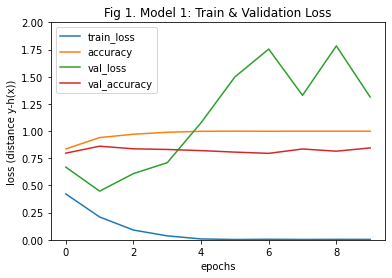

In [ ]:
#plot results
results = df(history_1.history)
results = results.rename(columns = {'loss': 'train_loss'})
results.plot(ylabel = ("loss (distance y-h(x))"), xlabel = ("epochs"), title = ("Fig 1. Model 1: Train & Validation Loss"), ylim = [0, 2])

print('Test Accuracy: %f' % (acc_1 * 100))

In [ ]:
%%time
#CNN Modified

#define CNN model: Machine Learning Mastery Model

#evoke keras model (API)
model_2 = Sequential()

##feature detectiong/extraction:
#Input layer: define embedding dimension & size
model_2.add(Embedding(input_dim = vocab_size, output_dim = 150, input_length = max_length_review))

#CNN layer: 1-D not 2-D image data
model_2.add(Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu', kernel_initializer='he_uniform'))
model_2.add(Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu', kernel_initializer='he_uniform'))
#Maxpooling layer: downsample features for generalizability
model_2.add(MaxPooling1D(pool_size = 2))
model_2.add(Dropout(0.5))

#CNN layer: 1-D not 2-D image data
model_2.add(Conv1D(filters = 64, kernel_size = 4, strides = 1, padding = 'same', activation = 'relu', kernel_initializer='he_uniform'))
model_2.add(Conv1D(filters = 64, kernel_size = 4, strides = 1, padding = 'same', activation = 'relu', kernel_initializer='he_uniform'))
#Maxpooling layer: downsample features for generalizability
model_2.add(MaxPooling1D(pool_size = 2))
model_2.add(Dropout(0.5))

#CNN layer: 1-D not 2-D image data
model_2.add(Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu', kernel_initializer='he_uniform'))
model_2.add(Conv1D(filters = 128, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu', kernel_initializer='he_uniform'))
#Maxpooling layer: downsample features for generalizability
model_2.add(MaxPooling1D(pool_size = 2))
model_2.add(Dropout(0.5))

##classify from features:
#flatten for MLP end-layer
model_2.add(Flatten())
#Fully-connected layer
model_2.add(Dense(100, activation = 'relu'))
#Output layer: for [0,1] classification
model_2.add(Dense(1, activation = 'sigmoid'))

#summarize model
print(model_2.summary())


#optimizer
adam = Adam()

#compile model
model_2.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

#fit/evaluate model
history_2 = model_2.fit(x_train, y_train, epochs = 20, batch_size = 50, steps_per_epoch = 25, shuffle = True, validation_split = 0.2, verbose = 1)
loss, acc = model_2.evaluate(x_test, y_test, verbose = 1)

print('Test Accuracy: %f' % (acc*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1375, 150)         10668300  
                                                                 
 conv1d_1 (Conv1D)           (None, 1375, 32)          14432     
                                                                 
 conv1d_2 (Conv1D)           (None, 1375, 32)          3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 687, 32)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 687, 32)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 687, 64)           8256      
                                                      

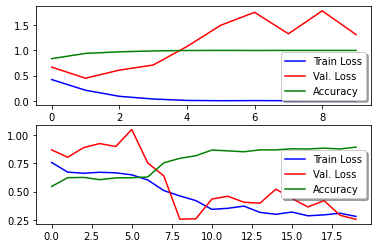

In [ ]:
#plot train & validation loss v. epochs
fig, ax = plt.subplots(2,1) #3 plot (fig) w/ value from array (ax)

ax[0].plot(history_1.history['loss'], color = 'b', label = "Train Loss")
ax[0].plot(history_1.history['val_loss'], color = 'r', label = "Val. Loss", axes = ax[0])
ax[0].plot(history_1.history['accuracy'], color = 'g', label = "Accuracy", axes = ax[0])
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history_2.history['loss'], color = 'b', label = "Train Loss")
ax[1].plot(history_2.history['val_loss'], color = 'r', label = "Val. Loss", axes = ax[1])
ax[1].plot(history_2.history['accuracy'], color = 'g', label = "Accuracy", axes = ax[1])
legend = ax[1].legend(loc = 'best', shadow = True)

Test Accuracy: 88.800001


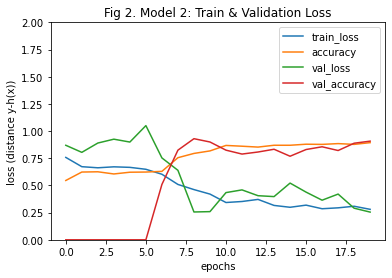

In [ ]:
#plot Model 2
results_2 = df(history_2.history)
results_2 = results_2.rename(columns = {'loss': 'train_loss'})
results_2.plot(ylabel = ("loss (distance y-h(x))"), xlabel = ("epochs"), title = ("Fig 2. Model 2: Train & Validation Loss"), ylim = [0, 2])

print('Test Accuracy: %f' % (acc * 100))

In [ ]:
#1000dense layer increased accuracry

#CGG + dropout stablized validation loss

#increasing epochs significantly doesn't help

#large batch size better

#adam is best (addelta & sdg)

#early stop also increases accucary

# Appendix

In [ ]:
#exploring the Kaggle dataset

#load the data
data = pd.read_csv('IMDB_Dataset.csv')

#sample the .csv tables
data.head()

#unique values of 'Sentiment' column (checking for spelling variations etc.)
data.sentiment.unique()

#number of positive reviews
pos_df = data.loc[data['sentiment'] == 'positive']
len(pos_df)

#number of negative reviews
neg_df = data.loc[data['sentiment'] == 'negative']
len(neg_df)


25000

In [ ]:
#create list for Positive Reviews
'''
match everything after 'comma' ($ = start at the end), ie. sentiment column value
if said value == 'positive'
remove said value & ',' before that value, and record review-content into pos_review
'''
pos_review = [re.sub('(\,[^,]*)$', '', ea_line) for ea_line in text_data if re.search('([^,]*)$', ea_line).group(1) == 'positive']

#create list for Negative Reviews
'''
match everything after 'comma' ($ = start at the end), ie. sentiment column value
if said value == 'negative'
remove said value & ',' before that value, and record review-content into neg_review
'''
neg_review = [re.sub('(\,[^,]*)$', '', ea_line) for ea_line in text_data if re.search('([^,]*)$', ea_line).group(1) == 'negative']


In [ ]:
#tokenize & add to vocab-dict all positive reviews
for review in pos_review_train:
  #split into tokens by white space
  tokens = review.split()
  #create a mapping table to use by 'translate' to match & replace all punctuations
  translate_table = str.maketrans('', '', string.punctuation)
  #match & replace all punctuations in ea. token
  tokens = [w.translate(translate_table) for w in tokens]

  #new: only include tokens of a review if in previously defined vocab_list
    #vocab_list (act as filter): stopwords + frequency filtered for all pos & neg training moview reviews
  tokens = [word for word in tokens if word in vocab_list]
  #join tokens into one string separated by ' '
  tokens = ' '.join(tokens)

  #add tokens for a-review to master-list
  pos_documents.append(tokens)


#tokenize & add to vocab-dict all negative reviews
for review in neg_review_train:
  #split into tokens by white space
  tokens = review.split()
  #create a mapping table to use by 'translate' to match & replace all punctuations
  translate_table = str.maketrans('', '', string.punctuation)
  #match & replace all punctuations in ea. token
  tokens = [w.translate(translate_table) for w in tokens]

  #new: only include tokens of a review if in previously defined vocab_list
    #vocab_list (act as filter): stopwords + frequency filtered for all pos & neg training moview reviews
  tokens = [word for word in tokens if word in vocab_list]
  #join tokens into one string separated by ' '
  tokens = ' '.join(tokens)

  #add tokens for a-review to master-list
  neg_documents.append(tokens)


#final merge of pos + neg list
  #['token_review_1 token_review_1 .....', 'token_review_2, token_review_2....', ....]
train_documents = pos_documents + neg_documents


In [ ]:
#for TEST

#create a list for reviews ("one string of tokens per review")
pos_documents = list()
neg_documents = list()


#tokenize & add to vocab-dict all positive reviews
for review in pos_review_test:
  #split into tokens by white space
  tokens = review.split()
  #create a mapping table to use by 'translate' to match & replace all punctuations
  translate_table = str.maketrans('', '', string.punctuation)
  #match & replace all punctuations in ea. token
  tokens = [w.translate(translate_table) for w in tokens]

  #new: only include tokens of a review if in previously defined vocab_list
    #vocab_list (act as filter): stopwords + frequency filtered for all pos & neg training moview reviews
  tokens = [word for word in tokens if word in vocab_list]
  #join tokens into one string separated by ' '
  tokens = ' '.join(tokens)

  #add tokens for a-review to master-list
  pos_documents.append(tokens)


#tokenize & add to vocab-dict all negative reviews
for review in neg_review_test:
  #split into tokens by white space
  tokens = review.split()
  #create a mapping table to use by 'translate' to match & replace all punctuations
  translate_table = str.maketrans('', '', string.punctuation)
  #match & replace all punctuations in ea. token
  tokens = [w.translate(translate_table) for w in tokens]

  #new: only include tokens of a review if in previously defined vocab_list
    #vocab_list (act as filter): stopwords + frequency filtered for all pos & neg training moview reviews
  tokens = [word for word in tokens if word in vocab_list]
  #join tokens into one string separated by ' '
  tokens = ' '.join(tokens)

  #add tokens for a-review to master-list
  neg_documents.append(tokens)


#final merge of pos + neg list
  #['token_review_1 token_review_1 .....', 'token_review_2, token_review_2....', ....]
test_documents = pos_documents + neg_documents
